In [1478]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

#### 0. Initialize

In [1479]:
N = 20
x = np.random.rand(N,2)

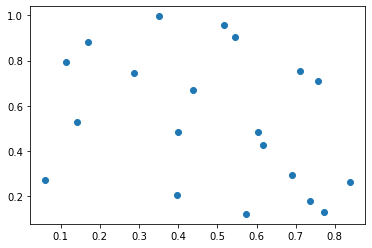

In [1480]:
plt.scatter(x[:,0],x[:,1])

In [1481]:
def sort_points(x: list[list], x0: list):
    """ Sort points by distance to a seed point x0, by the second order euclidean dist |xi - x0|**2"""
    return sorted(x, key=lambda xi: np.linalg.norm(xi-x0,2))

In [1482]:
def circle_center(A,B,C) -> list[float]:
    D = 2*(A[0]*(B[1]-C[1]) + B[0]*(C[1]-A[1]) + C[0]*(A[1]-B[1]))
    Ux = (A[0]**2+A[1]**2)*(B[1]-C[1])+(B[0]**2+B[1]**2)*(C[1]-A[1])+(C[0]**2+C[1]**2)*(A[1]-B[1])
    Uy = (A[0]**2+A[1]**2)*(C[0]-B[0])+(B[0]**2+B[1]**2)*(A[0]-C[0])+(C[0]**2+C[1]**2)*(B[0]-A[0])
    return np.array([Ux/D,Uy/D])

In [1483]:
def angle(point: list[float], center: list[float]) -> float:
    """ Returns the angle in degrees between a point and a center"""
    return (np.arctan2(point[1]-center[1], point[0]-center[0]) * 180/np.pi + 360) % 360

In [1508]:

def get_closest_point(x, x0, xj):
    """
    Find the point xk that creates the smallest circum-circle with x0 and xj and record the cetner of the circum-circle C.
    Return x, xj and C
    """
    # Running variables
    A_min = np.Infinity
    A_min_index = None

    # Loop through all points
    for i, xk in enumerate(x):
        a = np.linalg.norm(xk - x0)
        b = np.linalg.norm(x0 - xj)
        c = np.linalg.norm(xj - x0)
        s = (a+b+c) * 0.5
        A = (np.pi * 0.25) * s**2
        if A < A_min:
            A_min = A
            A_min_index = i

    # Update x and declare xk and C
    xk = x[A_min_index]
    x = np.delete(x, A_min_index, 0)
    C = circle_center(x0,xj,xk)
    return (x,xk,C)

In [1484]:
def plot_state(points: list = None, edges: list = None, triangles: list = None, circles: list = None, plot_size: int = 10):
    plt.figure(figsize=[plot_size, plot_size])
    plt.axes([0.1, 0.1, 0.8, 0.8], xlim=(0, 1), ylim=(0, 1))

    if points:
        plt.scatter(x=x[:,0],y=x[:,1])
    
    if edges:
        for edge in edges:
            plt.plot([edge[0][0],edge[1][0]],[edge[0][1],edge[1][1]],"g-")
    
    if triangles:
        for tri in triangles:
            t1 = plt.Polygon(tri,fill=False)
            plt.gca().add_patch(t1)

    if circles:
        for circ in circles:
            points_whole_ax = plot_size * 0.8 * 72    # 1 point = dpi / 72 pixels
            R = np.linalg.norm(circ[0])
            points_radius = 2 * R / 1.0 * points_whole_ax
            plt.scatter(circ[1], circ[2], s=points_radius**2, facecolors='none', edgecolors='blue')

#### 1. Select a seed point

In [1485]:
x0 = x[0]
x = np.delete(x,0,0)

#### 2. Sort accoring to |xi - x0|^2

In [1486]:
# Find the closest point to x0
x = sort_points(x,x0)

#### 3. Find the point xj cloests to x0

In [1487]:
# closest point
xj = x[0]
x = np.delete(x,0,0)

#### 4. Find the point xk that creates the smallest circum-circle with x0 and xj and record the cetner of the circum-circle C

In [1488]:
# Running variables
A_min = np.Infinity
A_min_index = None

# Loop through all points
for i, xk in enumerate(x):
    a = np.linalg.norm(xk - x0)
    b = np.linalg.norm(x0 - xj)
    c = np.linalg.norm(xj - x0)
    s = (a+b+c) * 0.5
    A = (np.pi * 0.25) * s**2
    if A < A_min:
        A_min = A
        A_min_index = i


# Update x and declare xk and C
xk = x[A_min_index]
x = np.delete(x, A_min_index, 0)
C = circle_center(x0,xj,xk)

#### 4.1 Visualize / check everything is working

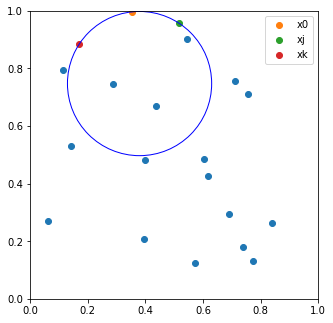

In [1489]:
plt.figure(figsize=[5, 5])
plt.axes([0.1, 0.1, 0.8, 0.8], xlim=(0, 1), ylim=(0, 1))
plt.scatter(x=x[:,0],y=x[:,1])
plt.scatter(x=[x0[0]],y=[x0[1]],label="x0")
plt.scatter(x=[xj[0]],y=[xj[1]],label="xj")
plt.scatter(x=[xk[0]],y=[xk[1]],label="xk")
plt.legend()

points_whole_ax = 5 * 0.8 *72    # 1 point = dpi / 72 pixels
R = np.linalg.norm(x0-C)
points_radius = 2 * R / 1.0 * points_whole_ax
plt.scatter(C[0], C[1], s=points_radius**2, facecolors='none', edgecolors='blue')


#### 5. Order points [x0, xj, xk] to give a right handed system: this is the initial seed convex hull

In [1490]:
triangles = []
tri = sorted([x0,xk,xj], key=lambda x: angle(x,C))
triangles.append(tri)

#### 6. Resort the remaining points according to |xi - C|^2 to give points si

In [1491]:
# Find the closest point to C
si = sort_points(x,C)

#### 7. Sequentially add the points si to the propogating 2D convex hull that is seeded with the triangle formed from [x0, xj, xk]. As a new point is added the faces of the 2D-that are visible to it form a a new triangles

[array([0.51762495, 0.95632341]), array([0.35177789, 0.99616756]), array([0.16956517, 0.88345505])]
[42.426945130228944, 75.63090460494209, 130.73243239107126]


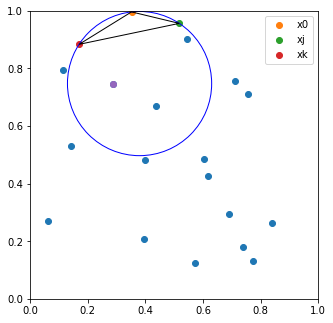

In [1492]:
plt.figure(figsize=[5, 5])
plt.axes([0.1, 0.1, 0.8, 0.8], xlim=(0, 1), ylim=(0, 1))
plt.scatter(x=x[:,0],y=x[:,1])
plt.scatter(x=[x0[0]],y=[x0[1]],label="x0")
plt.scatter(x=[xj[0]],y=[xj[1]],label="xj")
plt.scatter(x=[xk[0]],y=[xk[1]],label="xk")
plt.legend()

points_whole_ax = 5 * 0.8 *72    # 1 point = dpi / 72 pixels
R = np.linalg.norm(x0-C)
points_radius = 2 * R / 1.0 * points_whole_ax
plt.scatter(C[0], C[1], s=points_radius**2, facecolors='none', edgecolors='blue')
t1 = plt.Polygon(triangles[0],fill=False)
plt.gca().add_patch(t1)

si = sort_points(x, C)

plt.scatter(x=[si[0][0]], y=[si[0][1]])


In [1493]:
# Find visible edges from point o
# https://math.stackexchange.com/a/1743061

o = si[0]
tri = triangles[0]

angles = np.array([angle(x,o) for x in tri])

# If the triangle collides with the positive x-axis from the point - rotate 90 degrees to
if np.array([270 < x or x < 180 for x in angles]).all():
    angles += 90
    angles %= 360

i = np.argmax(angles)
max_angle = np.max(angles)
min_angle = np.min(angles)

edges = []
while True:
    edges.append((tri[i%3],tri[(i+1)%3]))
    i += 1
    if angles[i%3] == min_angle:
        break

[(array([0.16956517, 0.88345505]), array([0.51762495, 0.95632341]))]

[array([0.51762495, 0.95632341]), array([0.35177789, 0.99616756]), array([0.16956517, 0.88345505])]
[42.426945130228944, 75.63090460494209, 130.73243239107126]
[132.42694513022894, 165.6309046049421, 220.73243239107126]
[(array([0.16956517, 0.88345505]), array([0.51762495, 0.95632341]))]


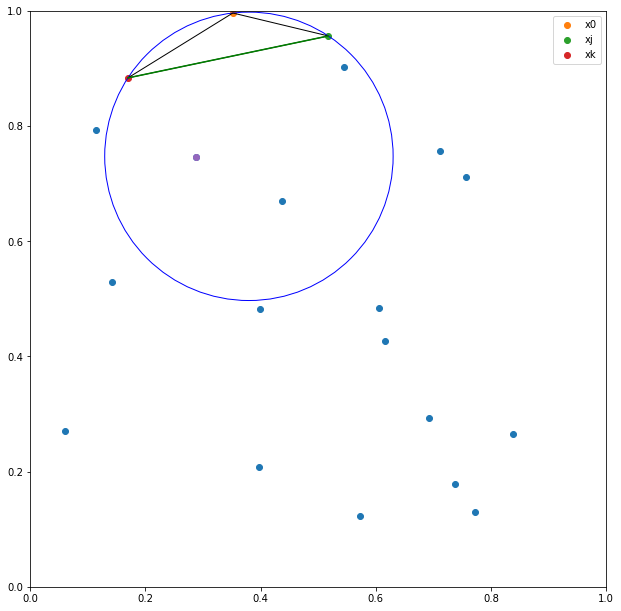

In [1494]:
plt.figure(figsize=[10, 10])
plt.axes([0.1, 0.1, 0.8, 0.8], xlim=(0, 1), ylim=(0, 1))
plt.scatter(x=x[:,0],y=x[:,1])
plt.scatter(x=[x0[0]],y=[x0[1]],label="x0")
plt.scatter(x=[xj[0]],y=[xj[1]],label="xj")
plt.scatter(x=[xk[0]],y=[xk[1]],label="xk")
for edge in edges:
    plt.plot([edge[0][0],edge[1][0]],[edge[0][1],edge[1][1]],"g-")
plt.legend()

points_whole_ax = 10 * 0.8 *72    # 1 point = dpi / 72 pixels
R = np.linalg.norm(x0-C)
points_radius = 2 * R / 1.0 * points_whole_ax
plt.scatter(C[0], C[1], s=points_radius**2, facecolors='none', edgecolors='blue')
t1 = plt.Polygon(triangles[0],fill=False)
plt.gca().add_patch(t1)

si = sort_points(x, C)

plt.scatter(x=[si[0][0]], y=[si[0][1]])

print(triangles[0])
print([angle(x,si[0]) for x in triangles[0]])
print([(angle(x,si[0])+90)%360 for x in triangles[0]])

print(edges)

In [1495]:
# add edges
for edge in edges:
    tri = sorted([edge[0],edge[1],o], key=lambda x: angle(x,C))
    triangles.append(tri)

[array([0.51762495, 0.95632341]), array([0.35177789, 0.99616756]), array([0.16956517, 0.88345505])]
[42.426945130228944, 75.63090460494209, 130.73243239107126]
[132.42694513022894, 165.6309046049421, 220.73243239107126]
[(array([0.16956517, 0.88345505]), array([0.51762495, 0.95632341]))]


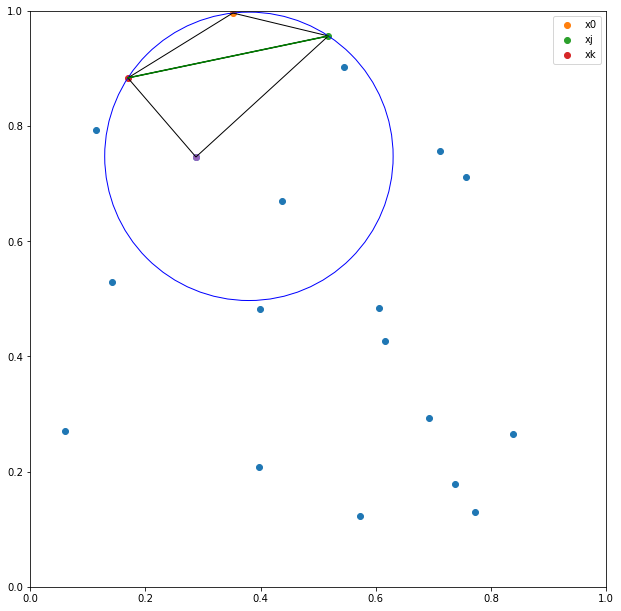

In [1496]:
plt.figure(figsize=[10, 10])
plt.axes([0.1, 0.1, 0.8, 0.8], xlim=(0, 1), ylim=(0, 1))
plt.scatter(x=x[:,0],y=x[:,1])
plt.scatter(x=[x0[0]],y=[x0[1]],label="x0")
plt.scatter(x=[xj[0]],y=[xj[1]],label="xj")
plt.scatter(x=[xk[0]],y=[xk[1]],label="xk")
for edge in edges:
    plt.plot([edge[0][0],edge[1][0]],[edge[0][1],edge[1][1]],"g-")
plt.legend()

points_whole_ax = 10 * 0.8 *72    # 1 point = dpi / 72 pixels
R = np.linalg.norm(x0-C)
points_radius = 2 * R / 1.0 * points_whole_ax
plt.scatter(C[0], C[1], s=points_radius**2, facecolors='none', edgecolors='blue')
for tri in triangles:
    t1 = plt.Polygon(tri,fill=False)
    plt.gca().add_patch(t1)

si = sort_points(x, C)

plt.scatter(x=[si[0][0]], y=[si[0][1]])

print(triangles[0])
print([angle(x,si[0]) for x in triangles[0]])
print([(angle(x,si[0])+90)%360 for x in triangles[0]])

print(edges)

In [1503]:
#https://stackoverflow.com/a/10984080

# Get distance to edge from every point

min_dist = np.inf
e_index_min_dist = None
p_index_min_dist = None

for i, edge in enumerate(edges):

    for j, (px, py) in enumerate(x):
        p0 = np.array([px,py])
        p1 = np.array(edge[0])
        p2 = np.array(edge[1])

        r = np.dot(p2 - p1, p0 - p1)
        r /= norm(p2 - p1)**2
        
        if r < 0:
            dist = norm(p0 - p1)
        elif 1 < r:
            dist = norm(p2 - p0)
        else:
            dist = np.sqrt(norm(p0 - p1)**2 - (r*norm(p2 - p1))**2)
        
        if dist < min_dist:
            min_dist = dist
            e_index_min_dist = i
            p_index_min_dist = j

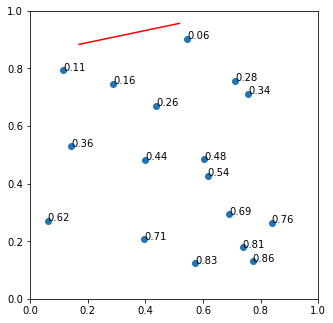

In [1501]:

edge = np.array(edges[0])

plt.figure(figsize=[5, 5])
plt.axes([0.1, 0.1, 0.8, 0.8], xlim=(0, 1), ylim=(0, 1))
plt.scatter(x=x[:,0],y=x[:,1])

for i, txt in enumerate(dists):
    plt.annotate(round(txt,2), (x[i,0],x[i,1]))

plt.plot(edge[:,0],edge[:,1],"r-")

plt.show()

In [1506]:
print(x[p_index_min_dist],edges[e_index_min_dist],min_dist)

[0.54467961 0.9028204 ] (array([0.16956517, 0.88345505]), array([0.51762495, 0.95632341])) 0.05995436873526559
